<a href="https://colab.research.google.com/github/dikshithakalva/IIIT-H/blob/main/Module_5_Lab_2_Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression Lab 2: Loss Function

In optimization, a loss function, also known as a cost function, is a measure of how well a model performs on a dataset. It quantifies the difference between the predicted values of the model and the actual ground truth values in the training data.

The primary goal of training a machine learning model is to minimize this loss function, as doing so leads to the model making more accurate predictions. The choice of the loss function depends on the type of problem being addressed (e.g., regression, classification) and the characteristics of the data.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

In [10]:
import numpy as np
import plotly.graph_objs as go

# Generating random data
np.random.seed(0)
x = np.random.randn(100)
y = np.random.randn(100)

# Create a scatter plot
scatter = go.Scatter(x=x, y=y, mode='markers')

# Create layout
layout = go.Layout(title='Interactive Scatter Plot', xaxis=dict(title='X-axis'), yaxis=dict(title='Y-axis'))

# Create figure
fig = go.Figure(data=[scatter], layout=layout)

# Display interactive plot
fig.show()

## 1. Regression

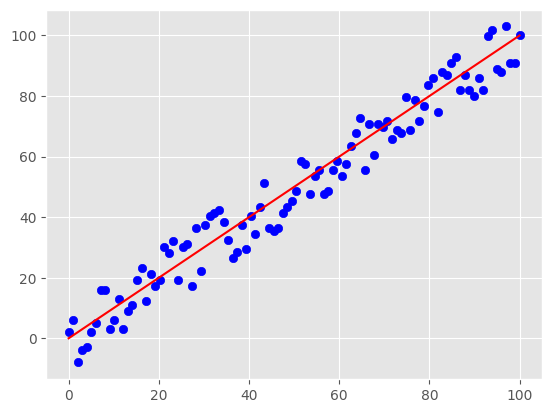

In [11]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

## Mean Squared Error:

## $MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

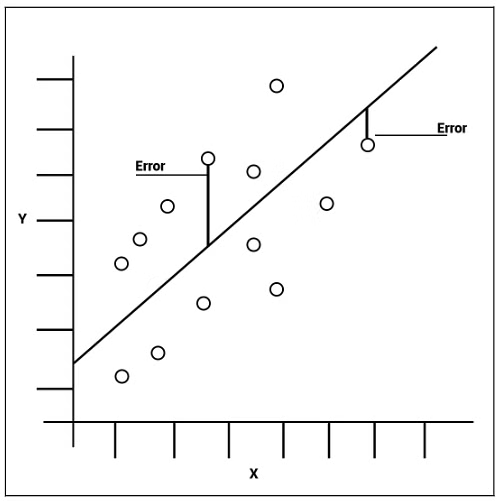

 Changing the units of error to be the same as the data, so we use Root Mean Squared Error instead. It is refered to as L2 loss.

In [12]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [13]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

## 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, pictures of cats and dogs, and the corresponding labels assigned to those images. Training a model that can predict a label for some input image belonging to either label class (cat or dog).

## The concept of maximum likelihood

Ideally, we would want to obtain a model $\hat{\theta}$ which maximizes the probability of correctly predicting data. Mathematically, the likelihood is:

$ \prod_{i=1}^{N}  \: \hat{\theta_i}^{\theta_i}$

This is because our actual data ($\theta_i$) is either 0 or 1 depending on the label of the data, and our predicted data ($\hat{\theta_i}$) is a probability.

We usually consider the negative log of the likelihood, since log is monotonic and easier to deal with as an optimization problem.

Hence, we have

$MLE = $ arg min $\: - \sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$

\


## Entropy and Cross-Entropy

For some event $x$, we can obtain **information** based on its probability distribution. For example, for some event that occurs with $p=1$, we gain no information. Now, if we flip a coin and see that we obtained heads, we say that we got 1 bit of information.

Thus, the information $I$ of some event $x$ is:

$I = -log_2 \: p(x)$

We say that events with a low probability of occuring give high information, and those with a low probability give low information.

Now, if we have some random variable $X$, its **entropy** is the expected value of the information obtained.

$H(x) = - \sum_{k} p_k \: log \: p_k$

Now, suppose we are trying to correctly predict labels of some data. Let P be the true distribution of the labels, and Q be the predicted distribution of labels.

Cross-Entropy is then defined as:

$H(P,Q) = - \sum_{x} P(x)\: log \: Q(x)$

which is basically the entropy between two probability distributions over the same events.

\


## MLE and Cross-Entropy

So, in the case of classification, the equation for minimization of the cross-entropy between the actual data and the predicted data would be:

arg min $\: -\sum_{i=1}^{N} P(x) \: log \: Q(x)$

$= $ arg min $\: -\sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$


which is exactly the same as what we had obtained for minimizing the negative log likelihood. Hence, the two problems are equivalent.

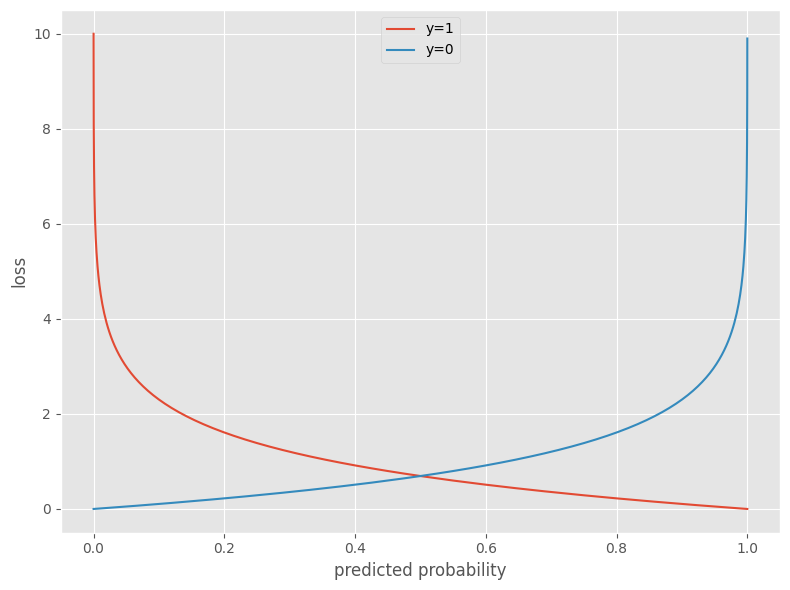

In [14]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

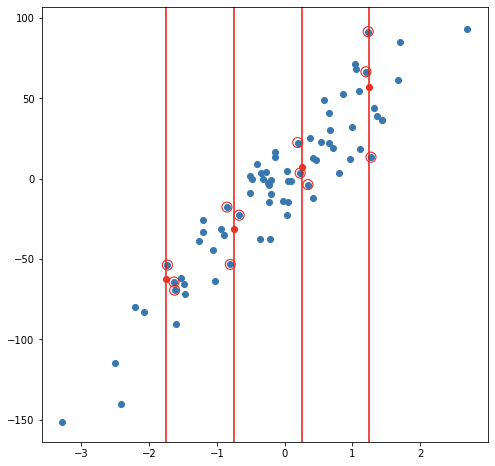

In [87]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [88]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [89]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [90]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [91]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [92]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

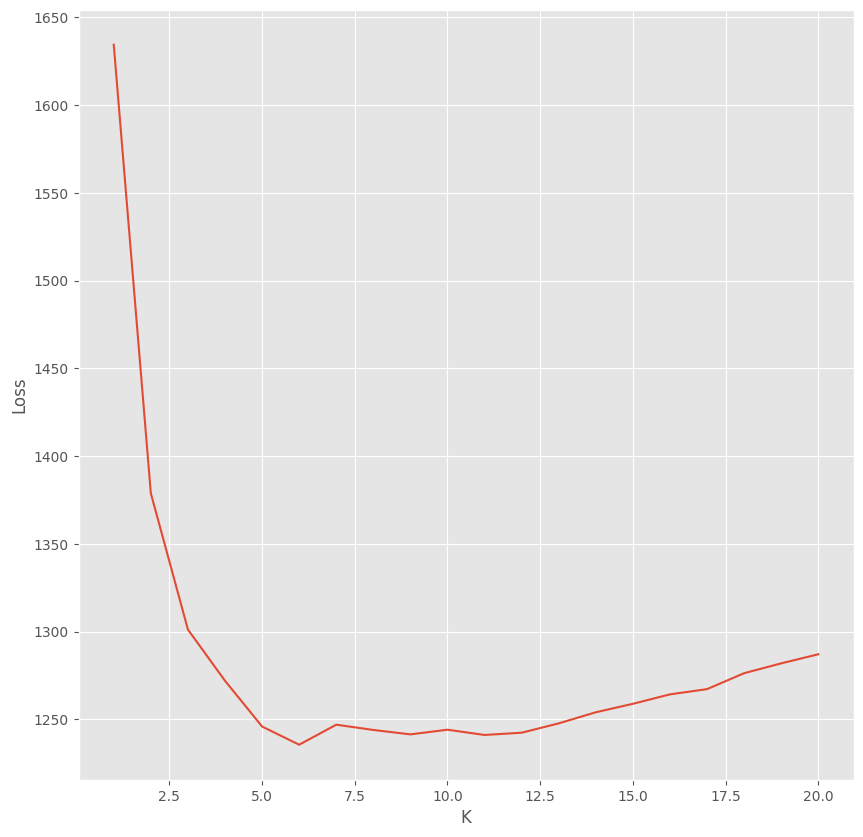

Minimum error 1235.524200073974 is at k = 5


In [93]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

#**Exercises**
## 1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.

### The calculation of loss function that MSE(Mean Squared Error) using KNN regression model

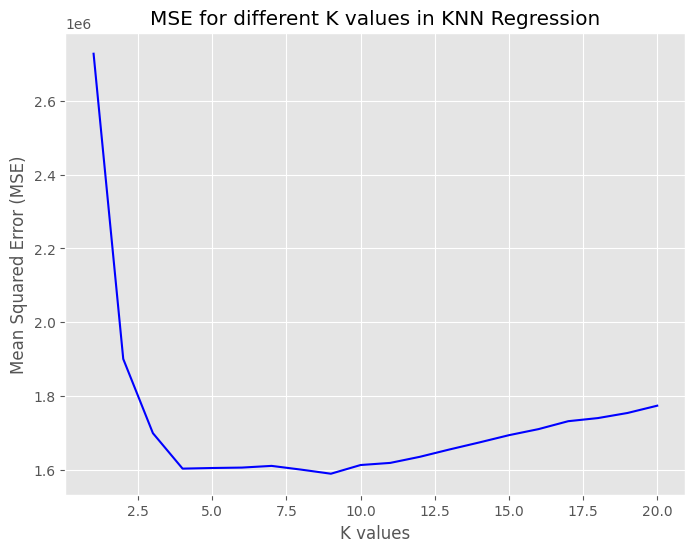

Mean Squared error: 1774134.0780103176


In [101]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

# Initialize lists to store MSE values and corresponding k values
mse_values = []
k_values = list(range(1, 21))  # Try k values from 1 to 20

# Loop through different values of k
for k in k_values:
    # Initialize KNN regression model for each k
    knn_model = KNeighborsRegressor(n_neighbors=k)

    # Fit the model on training data
    knn_model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = knn_model.predict(x_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Store MSE value for each k
    mse_values.append(mse)

# Plotting MSE values for different k
plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_values, linestyle='-', color='b')
plt.xlabel('K values')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for different K values in KNN Regression')
plt.grid(True)
plt.show()
print("Mean Squared error:",mse)

### The calculation of loss function that MAE(Mean Absolute Error) using KNN regression model

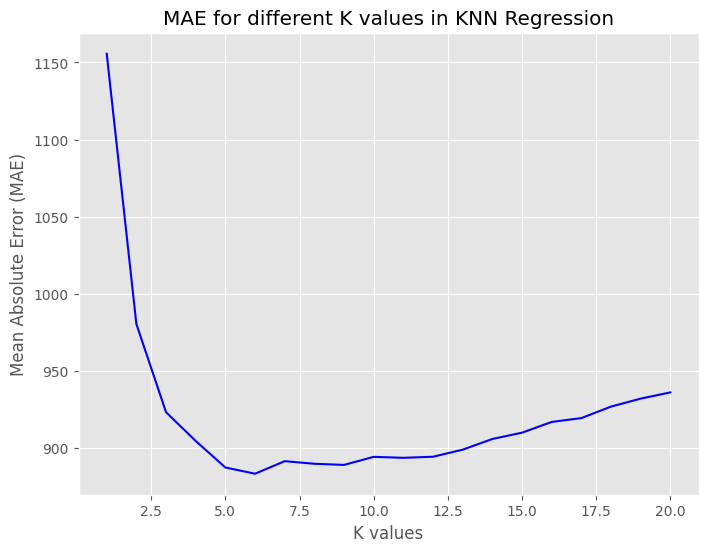

Mean Absolute Error 936.0921075987485


In [99]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# Initialize lists to store MAE values and corresponding k values
mae_values = []
k_values = list(range(1, 21))  # Try k values from 1 to 20

# Loop through different values of k
for k in k_values:
    # Initialize KNN regression model for each k
    knn_model = KNeighborsRegressor(n_neighbors=k)

    # Fit the model on training data
    knn_model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = knn_model.predict(x_test)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Store MAE value for each k
    mae_values.append(mae)

# Plotting MAE values for different k
plt.figure(figsize=(8, 6))
plt.plot(k_values, mae_values, linestyle='-', color='b')
plt.xlabel('K values')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for different K values in KNN Regression')
plt.grid(True)
plt.show()
print("Mean Absolute Error",mae)

By the above analysis of the Loss fuctions on the KNN regression model
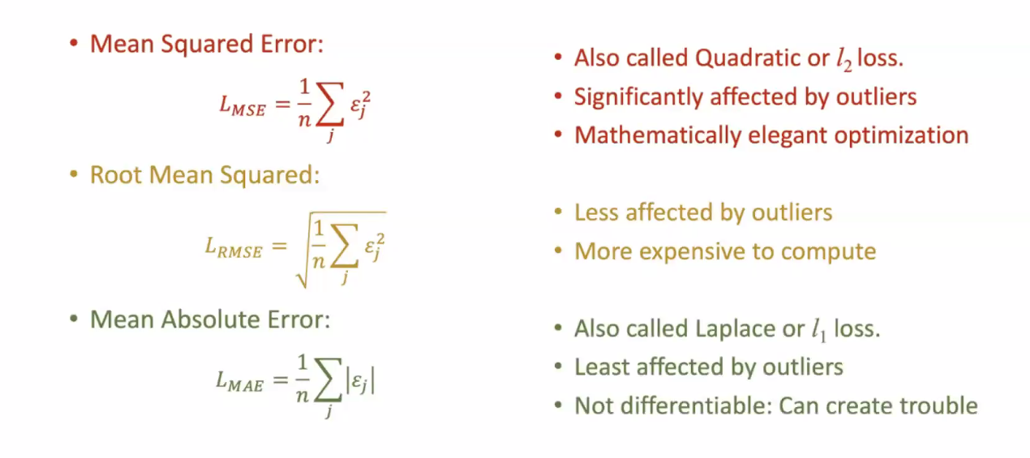

### The below are the approximate values for loss function

**MSE:**  1774134

**RMSE:** 1235

**MAE:**  981

---
 Seeing the above value, concluding that the MSE value is more compare to the other two loss function since they consider the outliers as well which is a drawback in MSE loss function. Althought the RMSE isless compare to the MAE, considering the MAE, the loss function is least effected.


## 2. Explore other loss functions and try to understand when and why they are used.

**Huber Loss:**

Combines qualities of MSE and MAE by being quadratic for smaller errors and linear for larger errors based on a threshold parameter (δ).
Less sensitive to outliers.

**Quantile Loss (Pinball Loss):**

Used in quantile regression to estimate different quantiles of the conditional distribution of the target variable.
Penalizes underestimation and overestimation differently.

**Log-Cosh Loss:**

A smooth approximation of MAE that behaves like MSE for small errors and like MAE for large errors.
Less sensitive to outliers and differentiable everywhere.

**Poisson Loss:**

Specifically designed for count regression tasks where the target variable represents count data.
Suited for modeling the number of occurrences of events following a Poisson distribution

**Cosine Similarity Loss:**

Measures the similarity between predicted and target vectors based on the cosine of the angle between them.
Useful in tasks where similarity between vectors is important.

## 3. Try out KNN-regression on other datasets see which values of K give the best results.

In [102]:
import pandas as pd
path= "/content/student_data.csv"
data=pd.read_csv(path)

In [103]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [104]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Fedu'].mean()
  df['Fedu'].fillna(mean_weight,inplace=True)

  mode_size = df['Medu'].mode()
  df['Medu'].fillna(mode_size,inplace=True)

  df.drop(['famsize'],axis=1,inplace=True)

  return pd.get_dummies(data)

data = preprocess(data)

data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [ ]:
data.info()

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
# Assuming G3 is the target variable
features = data.drop(columns=['G1', 'G2', 'G3'])  # Use all columns except G1, G2, G3 as features
target = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize k-NN Regression model (you can change the value of 'n_neighbors')
knn = KNeighborsRegressor(n_neighbors=5)  # 'n_neighbors' is the number of neighbors to consider

# Fit the model with the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



## Knowing the performance of loss function in all MSE, MAE and RMSE

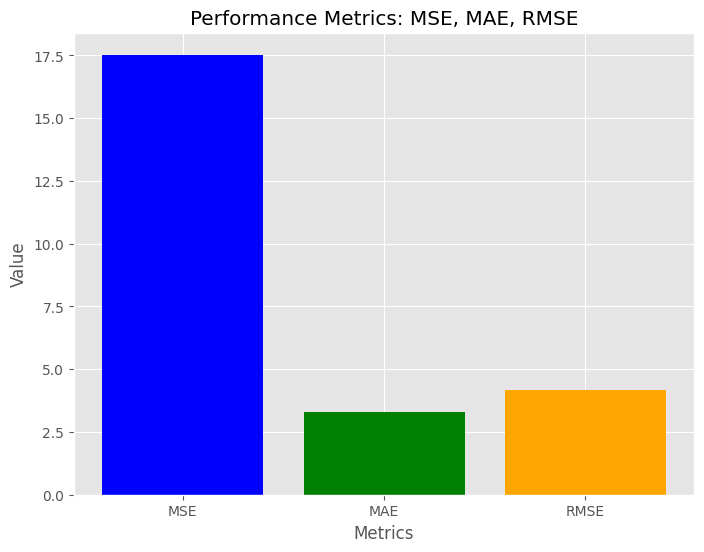

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Define features and target variable
# Assuming G3 is the target variable
features = data.drop(columns=['G1', 'G2', 'G3'])  # Use all columns except G1, G2, G3 as features
target = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize k-NN Regression model (you can change the value of 'n_neighbors')
knn = KNeighborsRegressor(n_neighbors=5)  # 'n_neighbors' is the number of neighbors to consider

# Fit the model with the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Plotting
metrics = ['MSE', 'MAE', 'RMSE']
values = [mse, mae, rmse]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Metrics: MSE, MAE, RMSE')
plt.show()

Mean Squared Eror is calculated for the data.

Mean Squared Error (MSE): 17.53012658227848


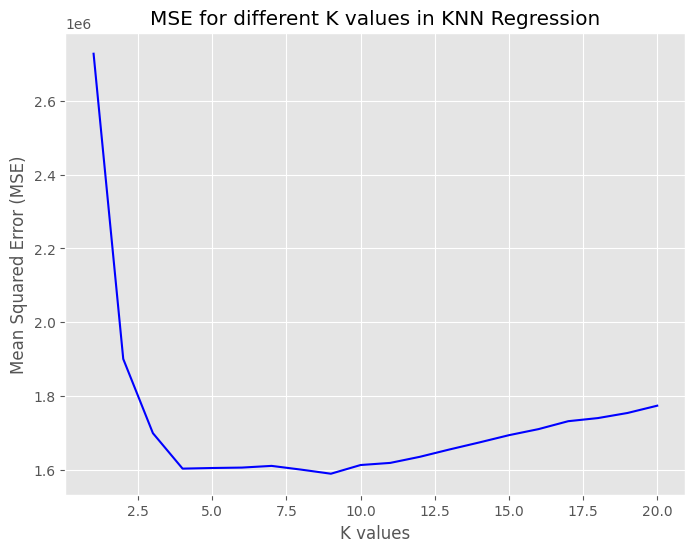

Mean Squared Error:  17.53012658227848


In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Define features and target variable
# Assuming G3 is the target variable
features = data.drop(columns=['G1', 'G2', 'G3'])  # Use all columns except G1, G2, G3 as features
target = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize k-NN Regression model (you can change the value of 'n_neighbors')
knn = KNeighborsRegressor(n_neighbors=5)  # 'n_neighbors' is the number of neighbors to consider

# Fit the model with the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Plotting MSE values for different k
plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_values, linestyle='-', color='b')
plt.xlabel('K values')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for different K values in KNN Regression')
plt.grid(True)
plt.show()
print("Mean Squared Error: ",mse)

Mean Absolute Error is calculated for the data.

Mean Absolute Error (MAE): 3.2962025316455694


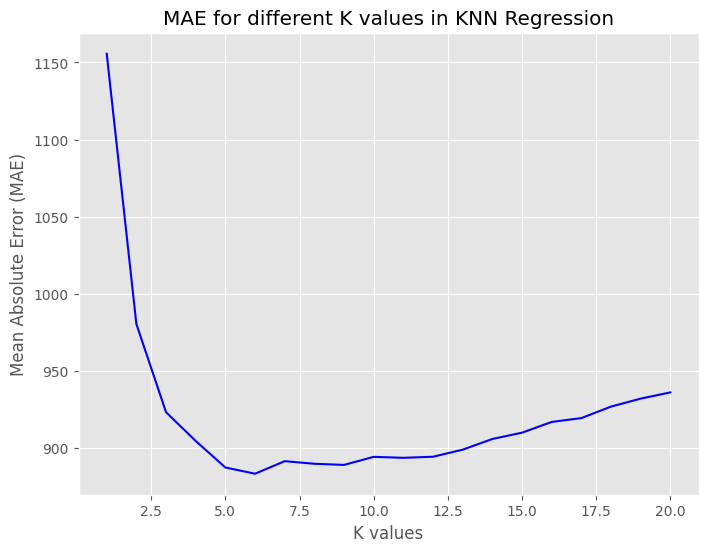

Mean Absolute Error 3.2962025316455694


In [128]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize k-NN Regression model (you can change the value of 'n_neighbors')
knn = KNeighborsRegressor(n_neighbors=5)  # 'n_neighbors' is the number of neighbors to consider

# Fit the model with the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Plotting MAE values for different k
plt.figure(figsize=(8, 6))
plt.plot(k_values, mae_values, linestyle='-', color='b')
plt.xlabel('K values')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for different K values in KNN Regression')
plt.grid(True)
plt.show()
print("Mean Absolute Error",mae)

Root Mean Squared Error(RMSE) is been calculated for the given data

Root Mean Squared Error (RMSE): 4.18689939958897


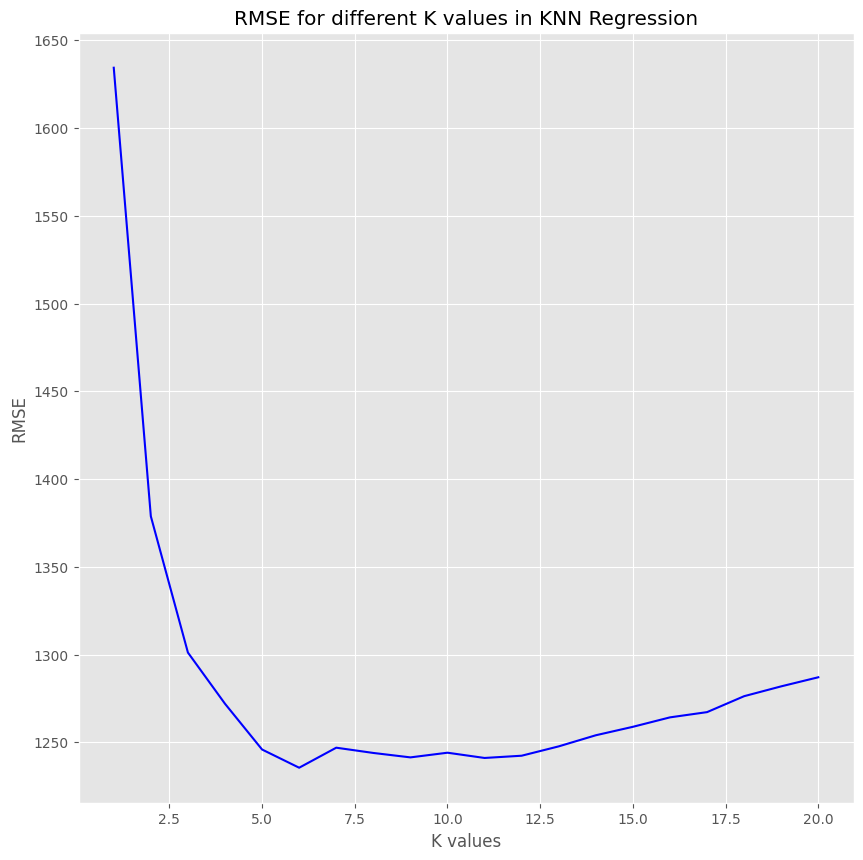

RMSE: 4.18689939958897


In [132]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting MAE values for different k
plt.figure(figsize=(10, 10))
plt.plot(k_values, rmse_val, linestyle='-', color='b')
plt.xlabel('K values')
plt.ylabel('RMSE')
plt.title('RMSE for different K values in KNN Regression')
plt.grid(True)
plt.show()
print("RMSE:",rmse)

The loss function observed in the new dataset Student_data

**MAE:** 3.29

**RMSE:** 4.18

**MSE:**  17.53